In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [82]:
df = pd.read_csv('/Users/dhruv/Dhruv/Apcela/RFQ.csv')

In [83]:
filter_state_data = df[df['MRC'] != 'No Bid'].copy()

filter_state_data['MRC'] = filter_state_data['MRC'].str.replace(r'[\$,]', '', regex=True)
filter_state_data['MRC'] = pd.to_numeric(filter_state_data['MRC'], errors='coerce')

In [84]:
filter_state_data = filter_state_data[filter_state_data['MRC'] <= 20000]

In [85]:
filter_state_data['A Loc City'] = filter_state_data['A Loc City'].str.lower()
filter_state_data['A Loc State'] = filter_state_data['A Loc State'].str.lower()

print(len(filter_state_data['A Loc City'].unique()))
city_corrections = {
    '2-4-1, marunouchi,chiyoda-ku tokyo': 'tokyo',
    'cartaret': 'carteret',
    'chicago ': 'chicago',
    'frankfurt am main': 'frankfurt',
    'hongkong': 'hong kong',
    'kwai chung, nt': 'kwai chung',
    'munchen': 'munich',
    'new york city': 'new york',
    'nan jing xi lu, jingan qu, shanghai shi': 'shanghai',
    'pudong new area, shanghai': 'shanghai',
    'yangpu district, shanghai': 'shanghai',
    'rio de janerio': 'rio de janeiro',
    'rio de janerio/rj': 'rio de janeiro',
    'rmz ecoworld, campus 6b, 5th & part 6th floor (units 501 & 502 & 601)\nsarjapur, marathalli outer ring road \ndevarabeesanahalli village, varthur hobli\nbangalore east taluk \nbangalore – 560 103': 'bangalore',
    'sao paolo': 'sao paulo',
    'st. louis': 'st louis',
    'washington ': 'washington'
}
filter_state_data['A Loc City'] = filter_state_data['A Loc City'].replace(city_corrections)



240


In [86]:
state_country_mapping = {
    'nj': 'nj', 'dc': 'dc', 'va': 'va', 'ks': 'ks', 'tx': 'tx', 'ga': 'ga', 'il': 'il', 'mn': 'mn', 
    'ny': 'ny', 'co': 'co', 'ct': 'ct', 'oh': 'oh', 'ca': 'ca', 'wa': 'wa', 'sc': 'sc', 'ut': 'ut',
    'pa': 'pa', 'fl': 'fl', 'ma': 'ma', 'ok': 'ok', 'mi': 'mi', 'tn': 'tn', 'nc': 'nc', 'wi': 'wi', 
    'az': 'az', 'or': 'or', 'mo': 'mo',
    
    'germany': 'germany', 'ireland': 'ireland', 'hong kong': 'hong kong', 'peru': 'peru',
    'mexico': 'mexico', 'india': 'india', 'china': 'china', 'russia': 'russia', 'south africa': 'south africa',
    'netherlands': 'netherlands', 'japan': 'japan', 'hk': 'hong kong', 'france': 'france', 
    'swizterland': 'switzerland', 'switzerland': 'switzerland', 'italy': 'italy', 'prc': 'china', 
    'canada': 'canada', 'london england': 'uk', 'uae': 'uae', 'ciudad de mexico': 'mexico', 
    'brasil': 'brazil', 'sweden': 'sweden', 'england': 'uk', 'australia': 'australia', 
    'alberta': 'canada', 'nicaragua': 'nicaragua', 'honduras': 'honduras', 'quebec': 'canada',
    'brazil': 'brazil', 'london': 'uk', 'jamaica': 'jamaica', 'switz.': 'switzerland', 'kow': 'hong kong',
    'in': 'india', 'poland': 'poland', 'czechia': 'czech republic', 'id': 'indonesia', 
    'new zealand': 'new zealand', 'united kingdom': 'uk', 'israel': 'israel', 'cyprus': 'cyprus', 
    'greece': 'greece', 'on, canada': 'canada', 'ab,canada': 'canada', 'united arab emirates': 'uae', 
    'romania': 'romania', 'qc': 'canada', 'ab': 'canada', 'spain': 'spain', 'colombia': 'colombia', 
    'nb': 'canada', 'quebec-canada': 'canada', 'lincolnshire': 'uk', 'santa catarina (sc)': 'brazil',
    'ontario - canada': 'canada', 'sp, brazil': 'brazil', 'beligium': 'belgium', 'pudong': 'china',
    'taipei': 'taiwan', 'bangalore':'india'
}

filter_state_data['A Loc State'] = filter_state_data['A Loc State'].str.strip().str.lower()
filter_state_data['A Loc State'] = filter_state_data['A Loc State'].replace(state_country_mapping)


In [87]:
def clean_term(term):
    term = str(term).strip().lower()

    if 'mtm' in term:
        return '12'
    elif 'co-term' in term or 'coterminous' in term:
        return '12'
    elif 'yr' in term or 'year' in term:
        parts = term.split()
        return str(int(parts[0]) * 12) if parts[0].isdigit() else '12'
    elif 'mo' in term or 'month' in term:
        return ''.join(filter(str.isdigit, term))
    elif term.isdigit():
        return term
    elif ',' in term:
        return term.split(',')[0].strip()

    return '12'



filter_state_data['Term_Cleaned'] = filter_state_data['Term'].apply(clean_term)
filter_state_data['Term_Cleaned'] = pd.to_numeric(filter_state_data['Term_Cleaned'], errors='coerce')



print(filter_state_data['Term_Cleaned'].unique())



[36 12 24 28 60 25 18 13]


In [88]:
import re

def clean_port_speed(value):
    if pd.isna(value):
        return None

    value = value.strip().lower()


    numbers = [float(n) for n in re.findall(r"[\d\.]+", value)]

    if not numbers:
        return None

    max_value = max(numbers)


    if "g" in value:
        max_value *= 1000

    return int(max_value)


data = pd.DataFrame({'Port Speed': [
    '100G', '1G', '5Mb', '10Mb', '20mB', '200Mb', '10G', '2.5G', '500',
    '100', '1000', '600', '100Mb', '100 Mbps', '20', '50', '100M',
    '100/25', '500/500', '1000/100', '1G Protected', '10G Wave', '10M',
    '100 Mbps', '10 Mbps', '1G CIR', '1G not 50Mb', 'P2P evpl', '10Gb'
]})

filter_state_data['Port_Speed_Mbps'] = filter_state_data['Port Speed'].apply(clean_port_speed)


filter_state_data['Port_Speed_Mbps']


3       100000.0
7       100000.0
8       100000.0
9       100000.0
10      100000.0
          ...   
7826      1000.0
7827      1000.0
7828      1000.0
7829      1000.0
7830      1000.0
Name: Port_Speed_Mbps, Length: 5190, dtype: float64

In [89]:
overall_median_speed = filter_state_data['Port_Speed_Mbps'].median()
filter_state_data['Port_Speed_Mbps'].fillna(overall_median_speed, inplace=True)


In [90]:
# filter_state_data["row_id"] = filter_state_data.index

In [91]:
import pandas as pd
import re

class_conditions = {
    "Broadband": ["broadband"],  
    "DarkFiber": ["DF", "dark fiber"],  
    "DIA": ["DIA"],  
    "EVPL": ["EVPL", "Epath"],  
    "EPL": ["EPL", "EPLS", "Ethernet"],  
    "Wavelength": ["Wave"],  
    "Microwave": ["Microwave"],  
    "MPLS": ["MPLS"]  
}

def classify_text(text):
    if not isinstance(text, str):
        return "None"
    
    text = text.strip().lower()

    if re.match(r'^(epl|epls|ethernet)\b', text):
        return "EPL"
    
    if re.match(r'^wave\b', text):
        return "Wavelength"
    
    if re.match(r'^eline\b', text):
        return "E_Line"

    if "new wave/epl" in text:
        return "Wavelength"

    if "protected epl/wave" in text:
        return "EPL"

    if "mpls ethernet" in text:
        return "MPLS"

    if text == "1g broadband (quoted dia)":
        return "DIA"

    classes = set()
    for class_name, keywords in class_conditions.items():
        if any(re.search(rf'\b{kw.lower()}\b', text) for kw in keywords):
            classes.add(class_name)

    return ', '.join(sorted(classes)) if classes else "None"

filter_state_data['generalized_Cir'] = filter_state_data['Cir Type'].apply(classify_text)

# print(filter_state_data[['Cir Type', 'generalized_Cir']].head(20))


In [92]:
filtered_data = filter_state_data[filter_state_data['generalized_Cir']!='None']


In [93]:
filtered_data['generalized_Cir'] = filtered_data['generalized_Cir'].astype(str).str.lower()


/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_12242/4287552487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['generalized_Cir'] = filtered_data['generalized_Cir'].astype(str).str.lower()


In [94]:
filtered_data.columns

Index(['Rec Num', 'RFQ', 'Date requested', 'Date Received', 'A Loc Address',
       'A Loc City', 'A Loc State', 'A Loc Zip', 'Z Loc Address', 'Z Loc City',
       'Z Loc State', 'Z Loc Zip', 'Cir Type', 'Port Speed', 'Term',
       'Provider', 'A Loc Local Loop Provider', 'MRC', 'NRC', 'RTD Latency',
       'Term_Cleaned', 'Port_Speed_Mbps', 'generalized_Cir'],
      dtype='object')

In [95]:
filtered_data.drop(columns=['Rec Num', 'RFQ', 'A Loc Address', 'A Loc City', 'A Loc Zip', 'Z Loc Address', 'Z Loc City', 'Z Loc State', 'Z Loc Zip', 'A Loc Local Loop Provider', 'NRC', 'RTD Latency', 'Cir Type', 'Port Speed', 'Term'], inplace=True)

/var/folders/t2/q9fs839s4l96y0sbpzp96jr40000gn/T/ipykernel_12242/754713938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.drop(columns=['Rec Num', 'RFQ', 'A Loc Address', 'A Loc City', 'A Loc Zip', 'Z Loc Address', 'Z Loc City', 'Z Loc State', 'Z Loc Zip', 'A Loc Local Loop Provider', 'NRC', 'RTD Latency', 'Cir Type', 'Port Speed', 'Term'], inplace=True)


In [104]:
filtered_data.columns

Index(['Date requested', 'Date Received', 'A Loc State', 'Provider', 'MRC',
       'Term_Cleaned', 'Port_Speed_Mbps', 'generalized_Cir'],
      dtype='object')

In [ ]:
filtered_data['A Loc State'].unique()



array(['nj', 'dc', 'va', 'ks', 'tx', 'uk', 'ga', 'il', 'mn', 'ny',
       'germany', 'co', 'ct', 'oh', 'ca', 'south kensington', 'wa',
       'ireland', 'hong kong', 'peru', nan, 'mexico', 'india', 'china',
       'california', 'ontario', 'ky', 'russia', 'md', 'south africa',
       'netherlands', 'japan', 'france', 'switzerland', 'italy', 'sc',
       'ut', 'pa', 'uae', 'fl', 'pud - china', 'brazil', 'sweden',
       'australia', 'canada', 'nicaragua', 'honduras', 'ma', 'ok',
       'jamaica', 'poland', 'czech republic', 'indonesia', 'new zealand',
       'new york', 'mi', 'tn', 'on', 'nsw-australia', 'israel', 'cyprus',
       'nc', 'wi', 'az', 'or', 'romania', 'spain', 'colombia', 'mo',
       'belgium', 'taiwan'], dtype=object)

In [97]:
sns.set(style="whitegrid", palette="Set2")


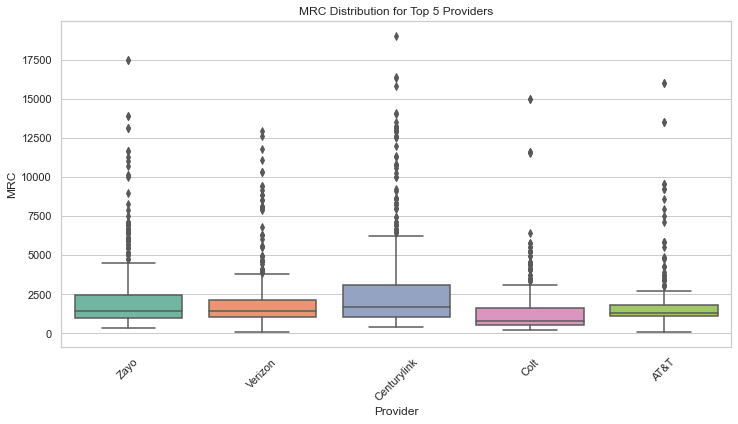

In [98]:
top_x = 5  # You can change this to 10, 15, etc.
top_providers = filtered_data['Provider'].value_counts().nlargest(top_x).index
filtered_df = filtered_data[filtered_data['Provider'].isin(top_providers)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Provider', y='MRC')
plt.title(f'MRC Distribution for Top {top_x} Providers')
plt.xticks(rotation=45)
plt.show()


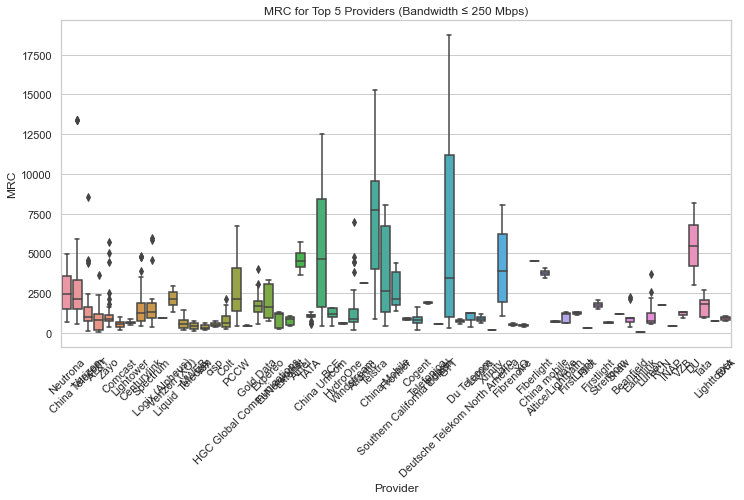

In [99]:
bandwidth_limit = 250  # Adjust this to filter
df_bw = filtered_data[filtered_data['Port_Speed_Mbps'] <= bandwidth_limit]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_bw, x='Provider', y='MRC')
plt.title(f'MRC for Top {top_x} Providers (Bandwidth ≤ {bandwidth_limit} Mbps)')
plt.xticks(rotation=45)
plt.show()


In [103]:
filtered_data['generalized_Cir'].unique()

array(['wavelength', 'evpl', 'epl', 'dia', 'broadband', 'darkfiber',
       'e_line', 'mpls', 'microwave'], dtype=object)

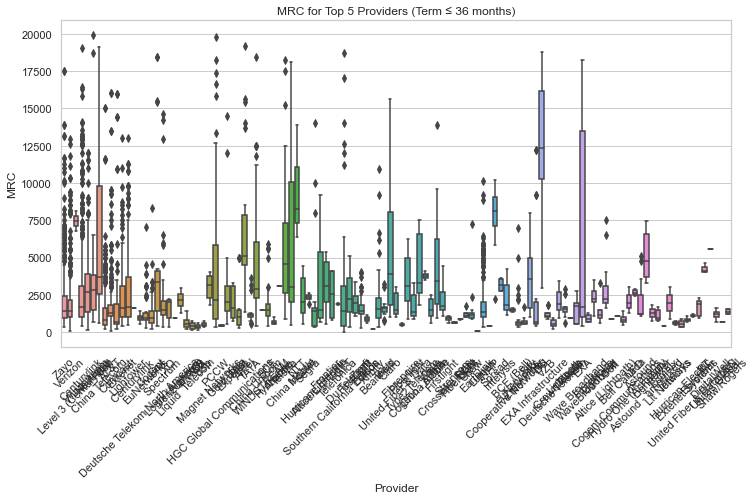

In [101]:
term_limit = 36  # Show only contracts <= 36 months
df_term = filtered_data[filtered_data['Term_Cleaned'] <= term_limit]

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_term, x='Provider', y='MRC')
plt.title(f'MRC for Top {top_x} Providers (Term ≤ {term_limit} months)')
plt.xticks(rotation=45)
plt.show()
